In [1]:
import pantarei as rei
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import src.MonteCarlo as mc
import src.interaction as interaction
import src.system as sys

from src.simulation_module import plot_val_over_NMC, simulation

In [2]:
configuration = 'fcc'
M = 6                                               # Cells per side
a = 1.0                                             # Lattice spacing
box = 4
n = box**3*4                                        # 4, 32, 108, 256, 500, 864, 1372

temperature = 2.                                    # Temperatures
sigma = 1.0                                         # Unità di misura di lunghezza
epsilon = 1.0                                       # Unità di misura di energia

rcut_over_sigma = 2.5                               # Distanza di taglio per il potenziale cut and shift

parameters_interaction = dict(sigma=sigma,epsilon=epsilon,rcut=rcut_over_sigma*sigma)

parameters_system = dict()
if configuration == 'cubic':
    parameters_system['M'] = M
    parameters_system['a'] = a
elif configuration == 'fcc':
    parameters_system['n'] = n
    parameters_system['box'] = box

# burnin = int(5e4)
# N_MC = int(1e5)
burnin = int(2e4)
N_MC = int(5e4)


densities = [0.05*(k+1) for k in range(20)]
# densities = [0.75]

In [ ]:
def simulation(temperature, density, steps, burnin_steps, mc_par_over_box=0.05):
    # temperature = [].append(temperatures)
    # energies = dict()
    # energies[f'{temperature:.2}'], virials[f'{temperature:.2}'], slopes[f'{temperature:.2}'], intecepts[f'{temperature:.2}'], rvalues[f'{temperature:.2}'] = [], [], [], [], []


    interact = interaction.Interaction(parameters_interaction, potential='lj')#,flags='-fbounds-check')

    P, E, W = [], [], []
    my_sys = sys.System(temperature, interact, parameters_system, config=configuration)
    my_sys.density = density
    montecarlo = mc.MonteCarlo(my_sys, interact)
    rnd.seed(0)
    # mc_parameter = 0.6/11*my_sys.box[0]
    mc_parameter = mc_par_over_box*my_sys.box[0]

    # run montecarlo until burnin without saving values
    for i in range(int(burnin_steps)):
        montecarlo.run(mc_parameter)
        # if i % 100 == 0:
            # E.append(my_sys.energy)
            # P.append(my_sys.pressure)
            # W.append(my_sys.virial)
    # reset acceptance ratio 
    temp_accep_ratio = montecarlo.accept_ratio
    montecarlo.n_accepted_moves = 0
    montecarlo.n_mc_moves = 0

    # run montecarlo until end of simulation and save every 100 mc cycles
    for i in range(int(steps - burnin_steps)):
        montecarlo.run(mc_parameter)
        if i % 100 == 0:
            E.append(my_sys.energy)
            # P.append(my_sys.pressure)
            W.append(my_sys.virial)

    print(f'temperature: {temperature:.2}, density: {density:5.3}, accept ratio: {montecarlo.accept_ratio:.2}')
    
    # return a dict of arrays
    P, E, W = np.array(P), np.array(E), np.array(W)
    return {'pressure': P, 'energy': E, 'virial': W,
            'mean_pressure': P.mean(), 'mean_energy': E.mean()}
scheduler = rei.scheduler.ThreadScheduler(backend='process')
simulation = rei.Thread(simulation, scheduler=scheduler) # new version


In [15]:
12.6/256/1e3
(60+47)/256/1e4

4.1796875e-05

In [ ]:
def correlation_energy_virial(data):
    from scipy import stats
    energy = data['energy']
    virial = data['virial']

    linear_regression = stats.linregress(energy,virial)
    m, q, r = linear_regression[0], linear_regression[1], linear_regression[2]
    return {'m': m, 'q': q, 'r': r}

    # fig = plt.figure()
    # x = np.linspace(energy.min(),energy.max())
    # plt.plot(energy,virial,'.')
    # plt.plot(x,m*x+q,'-',label=f'{r:.3}')
    # plt.legend()
    # plt.plot
    # plt.grid()
    # return fig


In [2]:
temperature = 1.0
densities = [0.05*(k+1) for k in range(24)]
mc_param = [0]
start = [0]
# for density in densities:
k = 16
# k=0
k += 1
k -= 1
density = densities[k]
if density > 0.9:
    mc_param[0] = 0.05
else:
    mc_param[0] = 0.2
# if (k==12) | (k==14) | (k==16):
#     mc_param[0] = 0.1
data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.05)
data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.1)
# data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.2)
# data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=mc_param[0])

if k > 17 or k < 12: start[0] = 250
elif k==16 or k==18: start[0] = 700
else: start[0] = 500

start[0] = 0

print(density)
label = f'T={temperature:.3}, density={density:.3}'
plot_val_over_NMC(data['energy'][start[0]:],title='Energy over MC cycles',x_multipl=100,label=label)
# plot_val_over_NMC(data['energy'][start[0]:],title='Energy over MC cycles',x_multipl=100,label=label,figname='mc_lj.png')
# plot_val_over_NMC(data['virial'][start[0]:])
# plt.plot(data['energy'][start[0]:],data['virial'][start[0]:],'.')


NameError: name 'simulation' is not defined

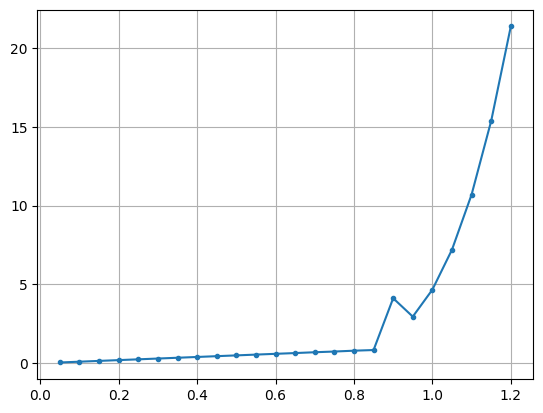

In [ ]:
temperature = 1.0
densities = [0.05*(k+1) for k in range(24)]
pressures = []
mc_param = [0]
start = [0]
rvalues = []
slopes = []
# for density in densities:
for k in range(len(densities)):
    density = densities[k]
    if density > 0.9:
        mc_param[0] = 0.05
    else:
        mc_param[0] = 0.2
    if (k==12) | (k==14) | (k==16):
        mc_param[0] = 0.1
    # data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.05)
    # data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.2)
    data = simulation(temperature=temperature,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=mc_param[0])

    if k > 17 or k < 12: start[0] = 250
    elif k==16 or k==18: start[0] = 700
    else: start[0] = 500

    from scipy import stats
    energy = data['energy'][start[0]:]
    virial = data['virial'][start[0]:]
    pressures.append(temperature*density + virial.mean())

    linear_regression = stats.linregress(energy,virial)
    m, q, r = linear_regression[0], linear_regression[1], linear_regression[2]

    rvalues.append(r)
    slopes.append(m)

plt.plot(densities,pressures,'.-')
plt.grid()

In [1]:
rei.report()

NameError: name 'rei' is not defined

In [ ]:
# dataset = rei.browse('simulation')
# print(dataset.columns())
# dataset['density'][0]
# u = dataset['energy'][k]
# dataset['virial'][2]
# plot_val_over_NMC(u)
# plt.plot(u,w,'.')

k = 0
# k += 1
density = densities[k]
data = simulation(temperature=1.0,density=density,steps=int(1e5),burnin_steps=0,mc_par_over_box=0.2)
# plot_val_over_NMC(data['virial'][200:])
# result = correlation_energy_virial(data)
# print(result['r'])

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002]


temperature: 2.0, density:   1.0, accept ratio: 0.0078


/tmp/ipykernel_68627/3095523325.py:37: RuntimeWarning: Mean of empty slice.
  'mean_pressure': P.mean(), 'mean_energy': E.mean()}


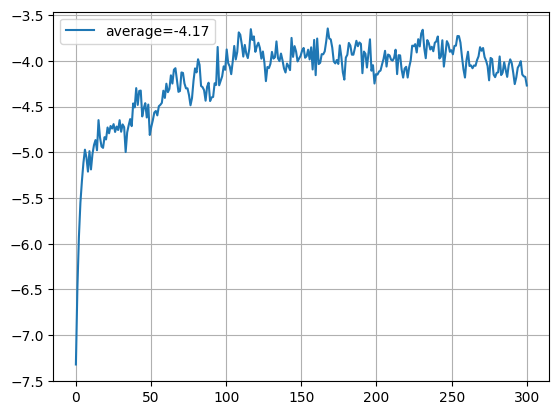

In [ ]:
data = simulation(2.,1.,3e4,0,mc_par_over_box=0.2)
P, E = data['pressure'], data['energy']

plot_val_over_NMC(E)

In [ ]:
from scipy import stats
energy = awa['energy']
virial = awa['virial']
x = np.linspace(energy.min(),energy.max())
linear_regression = stats.linregress(energy,virial)
m, q, r = linear_regression[0], linear_regression[1], linear_regression[2]
plt.plot(energy,virial,'.')
plt.plot(x,m*x+q,'-',label=f'{r:.3}')
plt.legend()
plt.plot
plt.grid()

NameError: name 'awa' is not defined

: 

In [6]:
def correlation_energy_virial(temperature, density, steps):
    burnin = steps*0.9
    burnin = 7e4
    sim = simulation(temperature,density,int(steps),int(burnin))

    from scipy import stats
    energy = sim['energy']
    virial = sim['virial']
    linear_regression = stats.linregress(energy[-int((steps-burnin)/100):],virial)
    m, q, r = linear_regression[0], linear_regression[1], linear_regression[2]

    return{'energy': energy, 'virial': virial, 'slope': m, 'intercept': q, 'rvalue': r}

temperature: 1.5, density:   0.4, accept ratio: 0.99


/tmp/ipykernel_68627/480980481.py:36: RuntimeWarning: Mean of empty slice.
  'mean_pressure': P.mean(), 'mean_energy': E.mean()}
/home/marcofava/compphys_examples/sam/env/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


temperature: 1.5, density:   0.5, accept ratio: 0.99
temperature: 1.5, density:  0.65, accept ratio: 0.99


Text(0, 0.5, 'R')

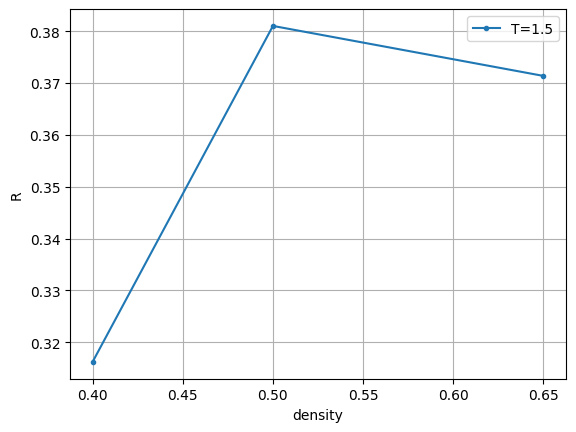

In [14]:
temperatures = [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
temperatures = [1.5]
densities = [0.05*(k+1) for k in range(23)]
densities = [0.4, 0.5, 0.65]
energies = dict()
virials = dict()
slopes = dict()
intecepts = dict()
rvalues = dict()

plt.figure()

for temperature in temperatures:
    energies[f'{temperature:.2}'], virials[f'{temperature:.2}'], slopes[f'{temperature:.2}'], intecepts[f'{temperature:.2}'], rvalues[f'{temperature:.2}'] = [], [], [], [], []

    for density in densities:
        values = correlation_energy_virial(temperature,density,1e5)
        energies[f'{temperature:.2}'].append(values['energy'])
        virials[f'{temperature:.2}'].append(values['virial'])
        slopes[f'{temperature:.2}'].append(values['slope'])
        intecepts[f'{temperature:.2}'].append(values['intercept'])
        rvalues[f'{temperature:.2}'].append(values['rvalue'])

    plt.plot(densities,rvalues[f'{temperature:.2}'],'.-',label=f'T={temperature:.2}')

    with open(f'data_correlation/correlation_T{temperature:.2}.txt','w') as f:
        f.write('# Density, R value, Slope\n')
        R = rvalues[f'{temperature:.2}']
        S = slopes[f'{temperature:.2}']
        for i in range(len(densities)):
            f.write(f'{densities[i]:8.3}{R[i]:10.4}{S[i]:8.2}\n')

plt.legend()
plt.grid()
plt.xlabel('density')
plt.ylabel('R')

0.4


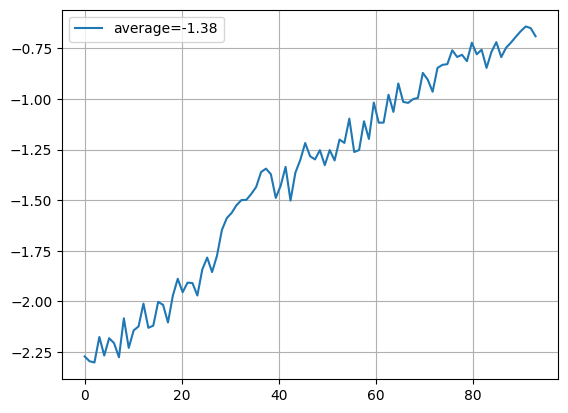

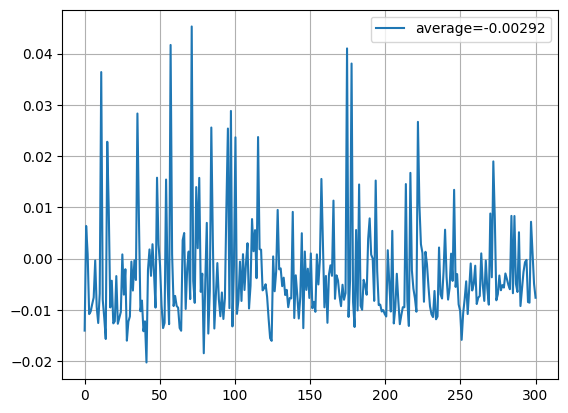

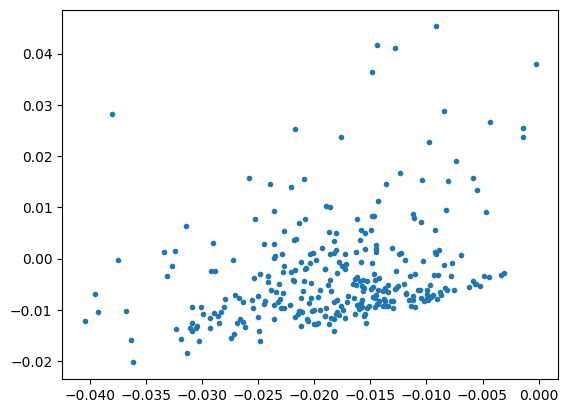

In [26]:
sdfoij = 0
# sdfoij += 1
plot_val_over_NMC(energies[f'{1.5:.2}'][sdfoij][7:100])
# plot_val_over_NMC(energies[sdfoij])
plot_val_over_NMC(virials[f'{1.5:.2}'][sdfoij])
plt.figure()
plt.plot(energies[f'{1.5:.2}'][sdfoij][700:],virials[f'{1.5:.2}'][sdfoij],'.')
print(densities[sdfoij])

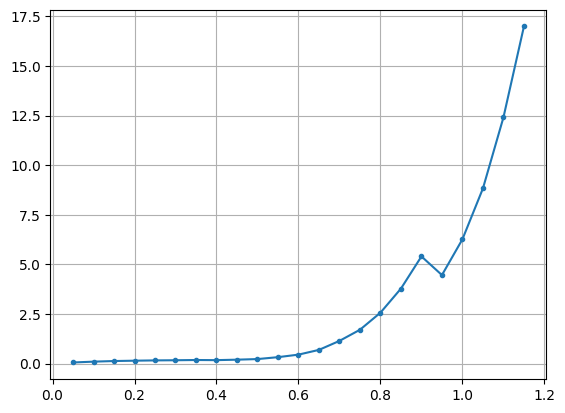

In [247]:
y = [densities[i]*temperature+np.average(virials[i]) for i in range(len(densities))]
plt.plot(densities,y,'.-')
plt.grid()

In [45]:
P = []
E = []
pressures = []
energies = []

interaction = src.interaction.Interaction(parameters,which_potential='lj')#,flags='-fbounds-check')

# for density in densities:
for k in range(np.size(densities)):
    density = densities[k]
    # mc_parameter = mc_parameters[k]

    my_sys = sys.System(temperature,interaction,M=M,a=a,config='crystal')
    my_sys.density = density
    montecarlo = mc.MonteCarlo(my_sys,interaction)
    rnd.seed(0)
    mc_parameter = 0.4/11*my_sys.box[0]

###############################################
# run montecarlo until burnin without saving values
    for _ in range(burnin):
        montecarlo.run(mc_parameter)
        # P.append(my_sys.pressure)
        # E.append(my_sys.energy)

    # reset acceptance ratio 
    temp_accep_ratio = montecarlo.accept_ratio
    montecarlo.n_accepted_moves = 0
    montecarlo.n_mc_moves = 0

    # run montecarlo until end of simulation and save every 100 mc cycles
    for i in range(int(N_MC-burnin)):
        montecarlo.run(mc_parameter)
        if i//100 == i/100:
            P.append(my_sys.pressure)
            E.append(my_sys.energy)
    
    pressures.append(np.average(P))
    energies.append(np.average(E))
    

# PRINT MESSAGE
    print(f"For density {density:.2}, accept ratio: {temp_accep_ratio:.2}->{montecarlo.accept_ratio:.2}, "+
        f"Energy={energies[-1]:.2}, Pressure={pressures[-1]:.2}")


For density 0.05, accept ratio: 0.91->0.91, Energy=-0.27, Pressure=0.096
For density 0.1, accept ratio: 0.87->0.86, Energy=-0.41, Pressure=0.14
For density 0.15, accept ratio: 0.85->0.84, Energy=-0.54, Pressure=0.19
For density 0.2, accept ratio: 0.82->0.81, Energy=-0.67, Pressure=0.23
For density 0.25, accept ratio: 0.79->0.78, Energy=-0.8, Pressure=0.28
For density 0.3, accept ratio: 0.77->0.77, Energy=-0.93, Pressure=0.32
For density 0.35, accept ratio: 0.75->0.74, Energy=-1.1, Pressure=0.38
For density 0.4, accept ratio: 0.73->0.72, Energy=-1.2, Pressure=0.44
For density 0.45, accept ratio: 0.7->0.7, Energy=-1.3, Pressure=0.51
For density 0.5, accept ratio: 0.68->0.67, Energy=-1.4, Pressure=0.59
For density 0.55, accept ratio: 0.65->0.65, Energy=-1.6, Pressure=0.69
For density 0.6, accept ratio: 0.63->0.63, Energy=-1.7, Pressure=0.81
For density 0.65, accept ratio: 0.6->0.6, Energy=-1.8, Pressure=0.96
For density 0.7, accept ratio: 0.57->0.57, Energy=-1.9, Pressure=1.1
For density 

-4.407307645902449


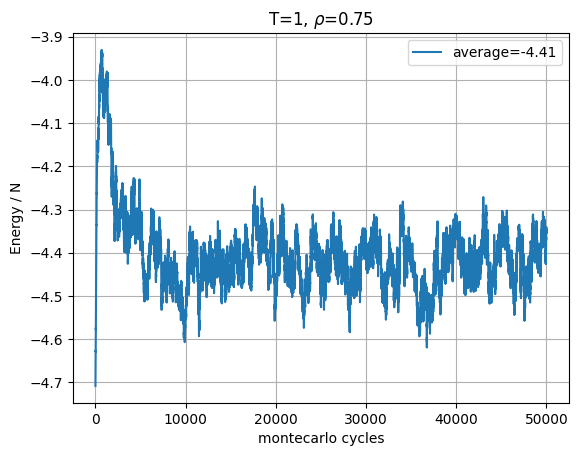

In [ ]:
# thig graph is for T=1, density=0.75, N_MC=5e4, all points have been saved sice cycle 1
plot_val_over_NMC(E)
plt.xlabel('montecarlo cycles')
plt.ylabel('Energy / N')
plt.title(r'T=1, $\rho$=0.75')
print(np.average(E))

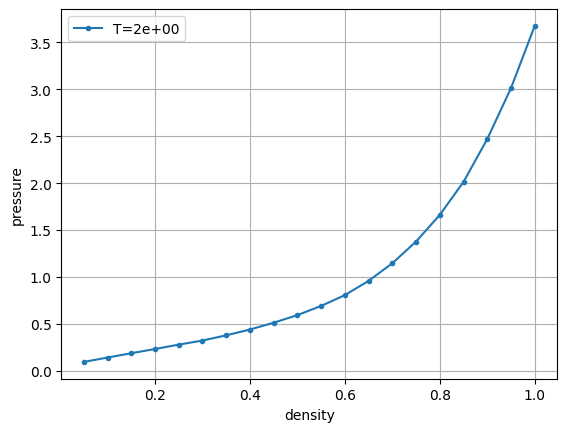

In [49]:
# this graph is for T=2, N_MC=5e4, 
# for every density, the value of energy is saved every 100 MC cycles after the burn-in time 
# (N_MC=5e4, burnin=2e4)
plt.plot(densities,pressures,'.-',label=f'T={temperature:.1}')
plt.xlabel('density')
plt.ylabel('pressure')
plt.legend()
plt.grid()
with open('EOS_T2.txt','w') as f:
    for i in range(len(densities)):
        f.write(f'{densities[i]:8.3}{pressures[i]:12.4}\n')